## KMeans Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [2]:
x,y=make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
x

array([[ 7.73438664,  7.60429234],
       [ 6.68199393,  5.58930147],
       [-5.80478476, -3.84025907],
       ...,
       [ 5.19322468,  7.61107616],
       [-4.63656625, -2.96696426],
       [ 5.57624704,  6.74834406]])

In [4]:
y

array([1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       0, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1,
       1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1,

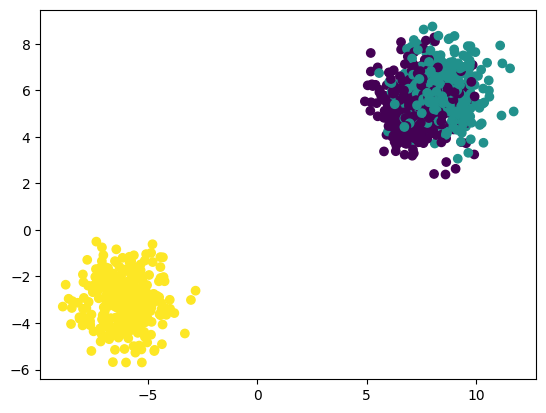

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [7]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Elbow mwthod to find optimal number of cluster

In [8]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(x_train_scaled)
  wcss.append(kmeans.inertia_)

In [9]:
wcss

[1340.0000000000011,
 59.26096821566609,
 40.39352584446243,
 34.39082644651114,
 28.142358639236345,
 22.550255036581387,
 20.416376371265848,
 18.045071141129203,
 16.61109342860505,
 14.787094803118146]

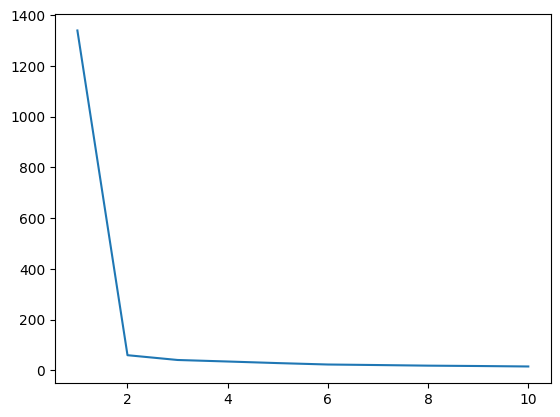

In [10]:
plt.plot(range(1,11),wcss)

In [11]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(x_train_scaled)

KMeans(n_clusters=3)

In [12]:
pred=kmeans.predict(x_test_scaled)

## KneeLocator

In [13]:
## KneeLocator

!pip install kneed

In [14]:
from kneed import KneeLocator

k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

np.int64(2)

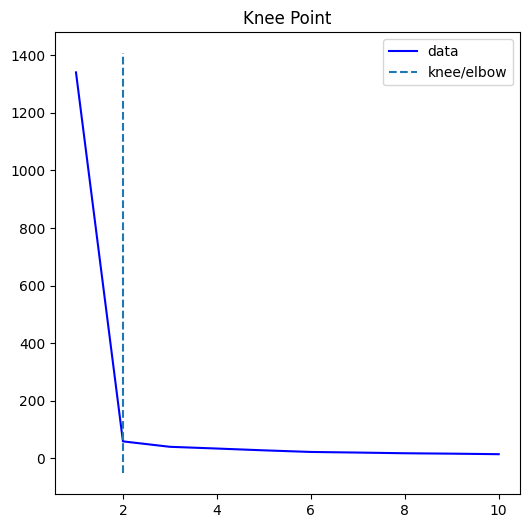

In [15]:
k1.plot_knee()


## Silhouette Coefficient Analysis

In [16]:
from sklearn.metrics import silhouette_score

silhout_coeff=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(x_train_scaled)
  score=silhouette_score(x_train_scaled,kmeans.labels_)
  silhout_coeff.append(score)

In [17]:
silhout_coeff

[np.float64(0.8759127081501626),
 np.float64(0.5271393256472179),
 np.float64(0.36973418690064663),
 np.float64(0.3190996197891643),
 np.float64(0.3530933106627457),
 np.float64(0.3505733038461859),
 np.float64(0.30355433788208724),
 np.float64(0.33895329186418943),
 np.float64(0.32970001979271507)]

Text(0.5, 1.0, 'Silhouette Coefficient Analysis')

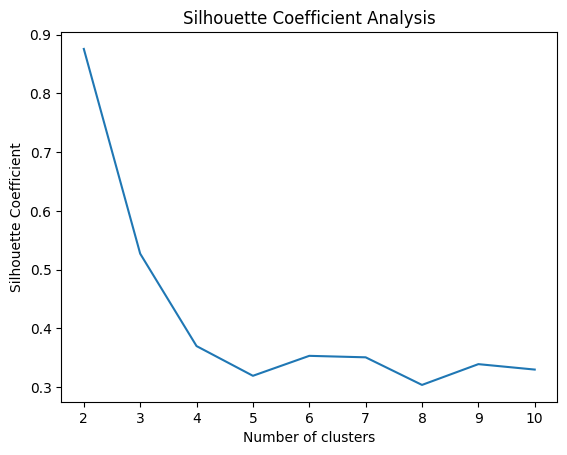

In [18]:
plt.plot(range(2,11),silhout_coeff)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient Analysis')